# Bank marketing

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [4]:
import pandas
import matplotlib.pyplot as plt
import seaborn
import numpy
from os import path
from sklearn import preprocessing

%matplotlib inline

#### Pobieramy zbiór informacji na temat klientów odnośnie subskrypcji lokat bankowych

In [5]:
banks = pandas.read_csv('bank-full.csv', delimiter=';')

#### Wielkość zbioru

In [6]:
len(banks)

45211

#### (Wielkość zbioru, ilość cech)

In [7]:
banks.shape

(45211, 17)

#### Przykładowe rekordy zawarte w bazie danych

In [8]:
banks.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


Kolumny zawierają takie cechy jak: wiek, praca, stan cywilny, wykształcenie, informacje o kredycie, średnie roczne saldo, kredyt mieszkaniowy, pożyczka, typ komunikacji, ostatni dzień kontaktu, ostatni miesiąc kontaktu, czas ostatniego kontaktu (w sekundach), liczba połączeń wykonanych do tego klienta, liczba dni jaka upłynęła od poprzedniego kontaktu z poprzedniej kampanii, liczba polączeń wykonanych przed kampanią, wynik poprzedniej kampanii, decyzja

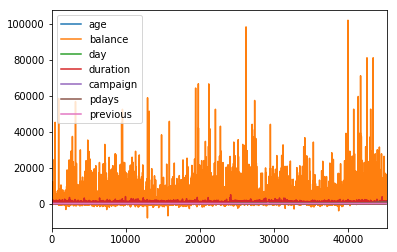

In [11]:
banks.plot()

#### Mapujemy wynik na 1 i 0

In [12]:
#values = {"yes": 1, "no": 0}
#banks.replace({"y": values})

#### Rozkład podjętych subskrypcji depozytów terminowych (yes/no).

no     39922
yes     5289
Name: y, dtype: int64

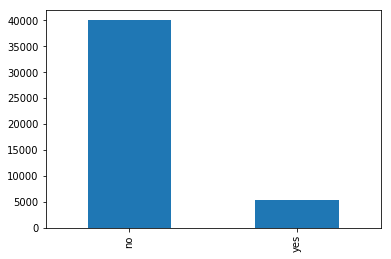

In [19]:
banks.y.value_counts().plot.bar()
banks.y.value_counts()


Decyzje negatywne znacząco przeważają nad tymi pozytywnymi, dlatego możemy zauważyć, że dopiero co 9 klient był zainteresowany założeniem lokaty.

#### Wykres zawodów osób biorących udział w badaniu

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

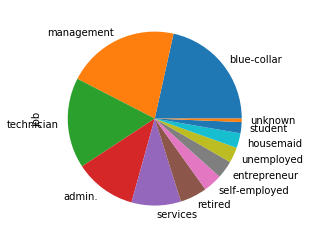

In [20]:
banks.job.value_counts().plot.pie()
banks.job.value_counts()


Klienci do których zostały wykonane połączenia głównie pracują ficzycznie, zajmują się zarządzaniem lub są technikami i stanowią oni ponad połowę wszystkich klientów.

#### Wykres wykształcenia

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

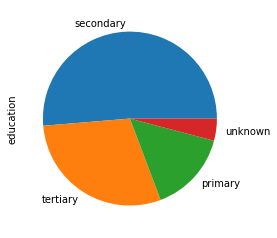

In [21]:
banks.education.value_counts().plot.pie()
banks.education.value_counts()

Największą grupę wśród klientów zajmują ludzie z wykształceniem średnim i jest to powyżej 50%, ponad 1/4 to klienci z wykształceniem wyższym.

#### Przypisanie do zmiennych decyzji odnośnie subskrypcji 

In [16]:
positive = banks.loc[banks['y'] == 'yes']
negative = banks.loc[banks['y'] == 'no']

#### Pozytywne odpowiedzi w zależności od zawodu

[Text(0.5, 1.0, 'Negative responses')]

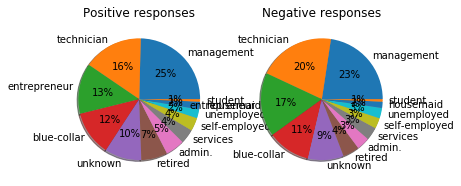

In [33]:
labels = banks.job.unique()
positive_fracs = positive.job.value_counts()
negative_fracs = negative.job.value_counts()

fig, axs = plt.subplots(1, 2)

axs[0].pie(positive_fracs, labels=labels, autopct='%1.0f%%', shadow=True)
axs[0].set(title="Positive responses")
axs[1].pie(negative_fracs, labels=labels, autopct='%1.0f%%', shadow=True)
axs[1].set(title="Negative responses")

W obu przypadkach możemy zauważyć, że największą grupę stanowią klienci zajmujący się zarządzeniem, a także technicy. 

#### Odpowiedzi w zależności od wykształcenia

[Text(0.5, 1.0, 'Negative responses')]

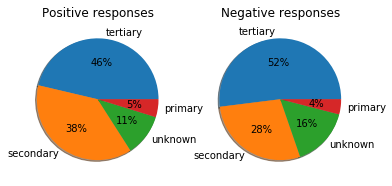

In [161]:
labels = banks.education.unique()
positive_fracs = positive.education.value_counts()
negative_fracs = negative.education.value_counts()

fig, axs = plt.subplots(1, 2)

axs[0].pie(positive_fracs, labels=labels, autopct='%1.0f%%', shadow=True)
axs[0].set(title="Positive responses")
axs[1].pie(negative_fracs, labels=labels, autopct='%1.0f%%', shadow=True)
axs[1].set(title="Negative responses")

Ponad połowa negatywnych odpowiedzi należała do ludzi z wykształceniem wyższym. Możemy zauważyć, że chętni na subskrypcje lokaty byli klienci z wykształceniem średnim, stanowili oni aż 38% pozytwnych odpowiedzi. Patrząc na to, że było ich znacząco mniej niż tych z wykształceniem wyższym, możemy zaobserwować, że większy odsetek z nich sięgał po lokate.

#### Odpowiedzi w zależności od stanu cywilnego

Stan cywilny zawiera 3 możliwości: żonaty, rozwiedziony, singiel

[Text(0.5, 1.0, 'Negative responses')]

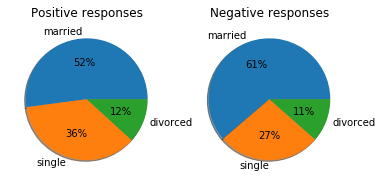

In [162]:
labels = banks.marital.unique()
positive_fracs = positive.marital.value_counts()
negative_fracs = negative.marital.value_counts()

fig, axs = plt.subplots(1, 2)

axs[0].pie(positive_fracs, labels=labels, autopct='%1.0f%%', shadow=True)
axs[0].set(title="Positive responses")
axs[1].pie(negative_fracs, labels=labels, autopct='%1.0f%%', shadow=True)
axs[1].set(title="Negative responses")

#### Odpowiedzi w zależności od wieku

##### Pozytywne

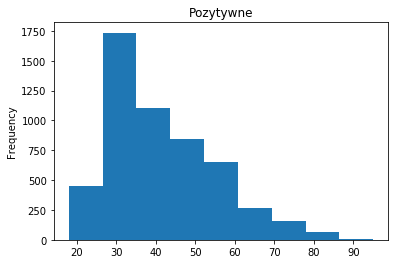

In [35]:
labels = banks.age.unique()
positive_fracs = positive.age.value_counts()


positive.age.plot(kind = 'hist', bins=9, title="Pozytywne")

##### Negatywne

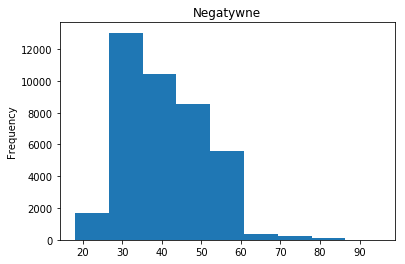

In [188]:
negative.age.plot(kind = 'hist', bins=9, title="Negatywne")


Na obu wykresach możemy zaobserwować znaczącą dominację grupy osób w wieku 30 lat, lecz mamy tutaj inne skale. Pozytywne odpowiedzi sięgają jedynie do 1700, natomiast negatywne do około 12000. Możemy zaobserwować wzrost odpowiedzi pozytywnych w stosunku do negatywnych, klientów w wieku 60 lat i więcej.

#### Decyzje w zależności od dnia miesiąca w jakim była przedstawiona oferta

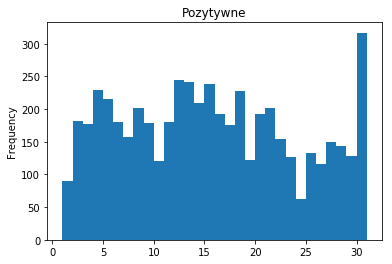

In [185]:
labels = banks.day.unique()
positive_fracs = positive.day.value_counts()

positive.day.plot(kind = 'hist', bins=30, title="Pozytywne")

Najwięcej poztywnych odpowiedzi otrzymaliśmy na koniec miesiąca.

## Nic ciekawego póki co, spróbujmy inaczej

#### Decyzje ludzi w zależności do tego czy mają pożyczkę

In [41]:
with_loan = banks.loc[banks['loan'] == 'yes']
without_loan = banks.loc[banks['loan'] == 'no']
without_loan.y.value_counts()

no     33162
yes     4805
Name: y, dtype: int64

Prawie 38 tysięcy klientów odpowiedziało, że posiada już pożyczkę i z tego około 12% zdecydowało się na lokatę bankową.

[Text(0.5, 1.0, 'People without loans')]

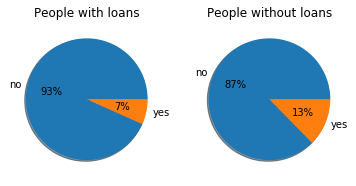

In [42]:
labels = with_loan.y.unique()
with_loan_decisions = with_loan.y.value_counts()
without_loan_decisions = without_loan.y.value_counts()

fig, axs = plt.subplots(1, 2)

axs[0].pie(with_loan_decisions, labels=labels, autopct='%1.0f%%', shadow=True)
axs[0].set(title="People with loans")
axs[1].pie(without_loan_decisions, labels=labels, autopct='%1.0f%%', shadow=True)
axs[1].set(title="People without loans")

Wykresy przedstawiają zależność decyzji w stosunku do tego, czy klient posiada pożyczkę, czy nie. Większy odsetek ludzi zdecydował się na lokatę bankową, jeśli nie posiadał pożyczki.

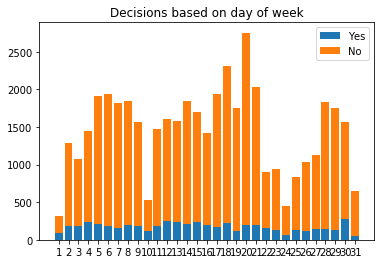

In [43]:
days = range(1,32)
decisions = banks.y
values = {}



for day in days:
    values[day] = list(banks.loc[banks['day'] == day].y)

list_values = [ v for v in values.values() ]
yesses = list(map(lambda x: x.count('yes'), list_values))
noes = list(map(lambda x: x.count('no'), list_values))
yes = plt.bar(days, yesses)
no = plt.bar(days, noes, bottom=yesses)

plt.title('Decisions based on day of week')
plt.xticks(days)
plt.legend((yes[0], no[0]), ('Yes', 'No'))

plt.show()